<a href="https://colab.research.google.com/github/GBH7/Meachine-Learning/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

평가기준은 RMSE

MSE:이상치(Outlier) 즉, 데이터들중크게떨어진값에민감함

test_y 데이터를 안주기에 제출한 점수의 RMSE 값으로 테스트 성능 확인해야함.

In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
#트레이닝 데이터의 결측치 확인
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
#테스트 데이터의 결측치 확인
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
x_data = train['hour']
y_data = train['hour_bef_temperature']

sns.scatterplot(x = x_data, y = y_data )

In [ ]:
#결측치 처리 - 0으로
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)

In [ ]:
#결측치 처리 - 평균으로
train.fillna(train.mean(),inplace = True)
test.fillna(test.mean(),inplace = True)

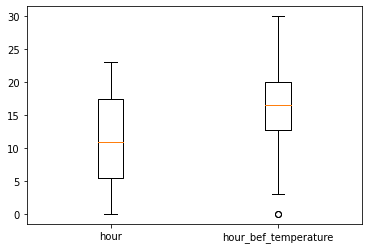

In [ ]:
#plt.figure(figsize=(20,8))
#sns.boxplot(data = train.columns[0])
#plt.show()

fig,ax = plt.subplots()
ax.boxplot([train['hour'],train['hour_bef_temperature']])
plt.xticks([1, 2], 
           ['hour', 'hour_bef_temperature'])
plt.show()

In [ ]:
colL  = ['hour','hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_visibility',
      'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']

i = 0
train_iqr = train
for i in range(len(colL)):
  Q1 = train[colL[i]].quantile(.25)
  Q3 = train[colL[i]].quantile(.75)
  IQR = Q3 - Q1
  train_iqr = train[(Q1-1.5*IQR <= train[colL[i]]) & (Q3+1.5*IQR >= train[colL[i]])]
  train_iqr = train_iqr.reset_index(drop=True)
train = train_iqr 
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...
1431,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1432,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1433,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1434,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


이상치 제거됨

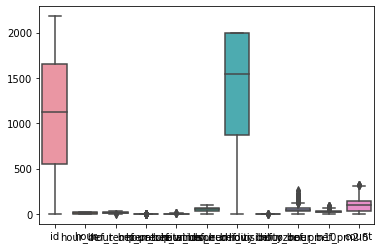

In [ ]:
sns.boxplot(data=train_iqr)
plt.show()

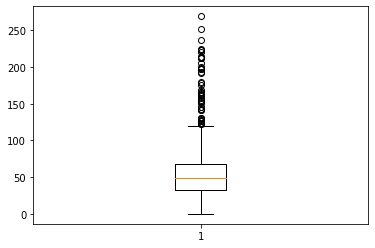

In [ ]:
plt.boxplot(train_iqr['hour_bef_pm10'])
plt.show()

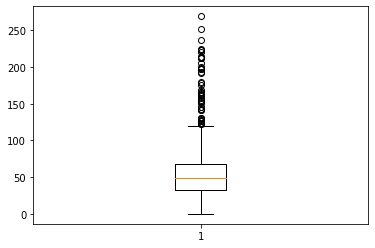

In [ ]:
plt.boxplot(train['hour_bef_pm10'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51bfe45fd0>,
      dtype=object)

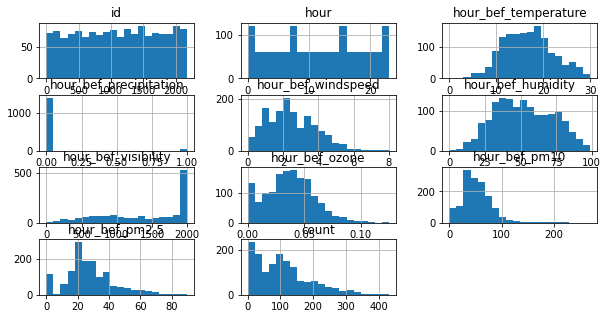

In [ ]:
train.hist(bins=20, figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51bf648350>,
      dtype=object)

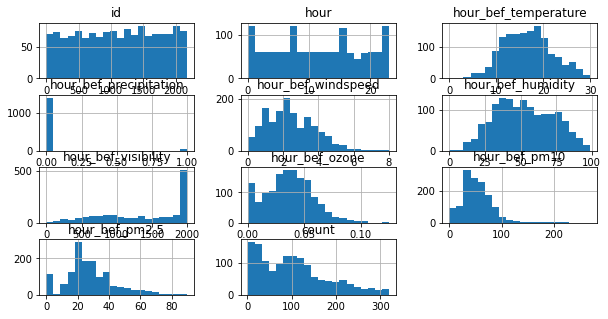

In [ ]:
train_iqr.hist(bins=20, figsize=(10,5))

In [ ]:
train_x = train.drop(['count'],axis = 1)
train_y = train['count']

In [ ]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

In [ ]:
pred = model.predict(test)

In [ ]:
acc_train = model.score(train_x, train_y)
acc_train

0.9690629180437987

0으로 결측치 처리후 트레이닝 데이터 모델의 accuracy 계산: 0.9716218234107702

평균으로 결측치 처리후 트레이닝 데이터 모델의 accuracy 계산: 0.9694935655732454

0으로 결측치 처리후 이상치 제거 후 데이터모델의 accuracy 계산: 0.9694295434765218

In [ ]:
submission = pd.read_csv('submission.csv')
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [ ]:
submission['count'] = pred

In [ ]:
submission

,id,count
0,0,96.21
1,1,235.65
2,2,93.13
3,4,25.23
4,5,66.66
...,...,...
710,2148,53.73
711,2149,64.54
712,2165,129.17
713,2166,158.09


In [ ]:
submission.to_csv('베이스라인.csv',index = False)